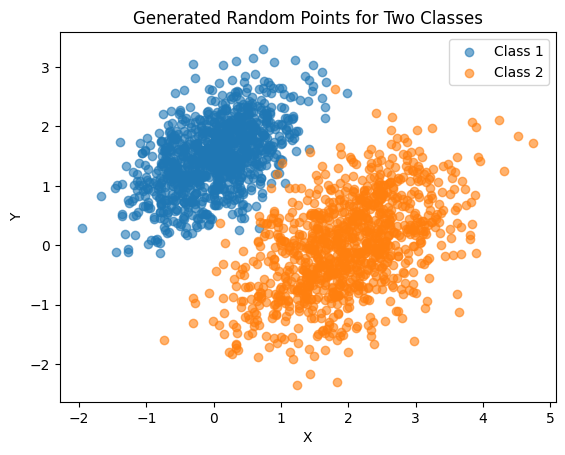

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mean1 = [0, 1.5]
cov1 = [[1/3, 1/6], [1/6, 1/3]]
labels1 = np.zeros(1000)

mean2 = [2, 0]
cov2 = [[2/3, 1/3], [1/3, 2/3]]
labels2 = np.ones(1000)

class1_points = np.random.multivariate_normal(mean1, cov1, 1000)
class2_points = np.random.multivariate_normal(mean2, cov2, 1000)

points = np.vstack((class1_points, class2_points))
labels = np.concatenate((labels1, labels2))

plt.scatter(class1_points[:, 0], class1_points[:, 1], label="Class 1", alpha=0.6)
plt.scatter(class2_points[:, 0], class2_points[:, 1], label="Class 2", alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Generated Random Points for Two Classes")
plt.show()

In [2]:
import tensorflow as tf

W = tf.Variable(tf.random.uniform([2, 1], -1.0, 1.0), dtype=tf.float32)
b = tf.Variable(0.0, dtype=tf.float32)

def forward_pass(inputs):
    return tf.sigmoid(tf.matmul(inputs, W) + b)

inputs = tf.random.normal([5, 2])  # 5 points, 2 features
predictions = forward_pass(inputs)
print(predictions)

tf.Tensor(
[[0.2806899 ]
 [0.8220484 ]
 [0.22569111]
 [0.48060653]
 [0.35189313]], shape=(5, 1), dtype=float32)


In [3]:
def mean_squared_error_loss(targets, predictions):
    return tf.reduce_mean(tf.square(targets - predictions))


In [4]:
def training_step(inputs, targets, learning_rate=0.1):
    with tf.GradientTape() as tape:
        predictions = forward_pass(inputs)
        loss = mean_squared_error_loss(targets, predictions)
    
    # Compute the gradients
    gradients = tape.gradient(loss, [W, b])
    
    # Update the weights and bias
    W.assign_sub(learning_rate * gradients[0])
    b.assign_sub(learning_rate * gradients[1])
    
    return loss


In [5]:
inputs_tensor = tf.convert_to_tensor(points, dtype=tf.float32)
targets_tensor = tf.convert_to_tensor(labels.reshape(-1, 1), dtype=tf.float32)

for step in range(50):
    loss = training_step(inputs_tensor, targets_tensor)
    print(f"Step {step+1}, Loss: {loss.numpy()}")


Step 1, Loss: 0.5708290934562683
Step 2, Loss: 0.5630180835723877
Step 3, Loss: 0.5550564527511597
Step 4, Loss: 0.5469431281089783
Step 5, Loss: 0.5386766791343689
Step 6, Loss: 0.5302554965019226
Step 7, Loss: 0.5216769576072693
Step 8, Loss: 0.5129384398460388
Step 9, Loss: 0.5040366649627686
Step 10, Loss: 0.4949679672718048
Step 11, Loss: 0.48572835326194763
Step 12, Loss: 0.4763137102127075
Step 13, Loss: 0.46671977639198303
Step 14, Loss: 0.4569428563117981
Step 15, Loss: 0.4469798505306244
Step 16, Loss: 0.4368286728858948
Step 17, Loss: 0.4264889657497406
Step 18, Loss: 0.41596248745918274
Step 19, Loss: 0.4052540361881256
Step 20, Loss: 0.39437195658683777
Step 21, Loss: 0.3833288550376892
Step 22, Loss: 0.37214234471321106
Step 23, Loss: 0.36083558201789856
Step 24, Loss: 0.34943774342536926
Step 25, Loss: 0.3379840552806854
Step 26, Loss: 0.3265154957771301
Step 27, Loss: 0.3150783181190491
Step 28, Loss: 0.3037227392196655
Step 29, Loss: 0.2925017774105072
Step 30, Loss: 0

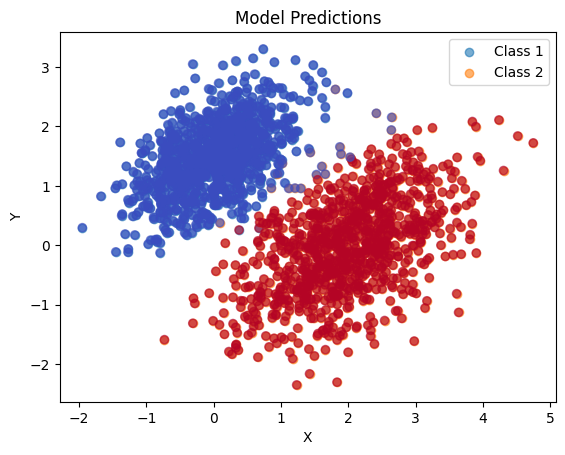

In [6]:
predictions = forward_pass(inputs_tensor)

classified_labels = (predictions > 0.5).numpy().astype(int)

plt.scatter(class1_points[:, 0], class1_points[:, 1], label="Class 1", alpha=0.6)
plt.scatter(class2_points[:, 0], class2_points[:, 1], label="Class 2", alpha=0.6)
plt.scatter(points[:, 0], points[:, 1], c=classified_labels.flatten(), cmap="coolwarm", alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Model Predictions")
plt.show()

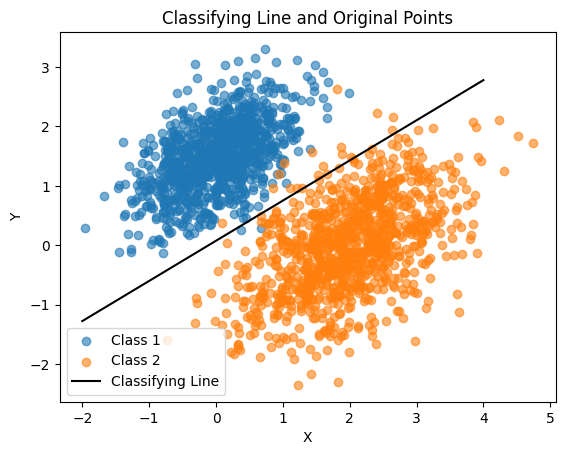

In [7]:
x_vals = np.linspace(-2, 4, 100)
y_vals = (-W[0].numpy() * x_vals - b.numpy()) / W[1].numpy()

# Plot with classifying line
plt.scatter(class1_points[:, 0], class1_points[:, 1], label="Class 1", alpha=0.6)
plt.scatter(class2_points[:, 0], class2_points[:, 1], label="Class 2", alpha=0.6)
plt.plot(x_vals, y_vals, label="Classifying Line", color="black")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Classifying Line and Original Points")
plt.show()


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4664 - loss: 0.9109 - val_accuracy: 0.4967 - val_loss: 0.8417
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5136 - loss: 0.8124 - val_accuracy: 0.5517 - val_loss: 0.7583
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5583 - loss: 0.7397 - val_accuracy: 0.6167 - val_loss: 0.6813
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6359 - loss: 0.6649 - val_accuracy: 0.7100 - val_loss: 0.6120
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7149 - loss: 0.5937 - val_accuracy: 0.7733 - val_loss: 0.5491
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7958 - loss: 0.5296 - val_accuracy: 0.8350 - val_loss: 0.4947
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8376 - loss: 0.4918 - val_accuracy: 0.8767 - val_loss: 0.4458
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8789 - loss: 0.4424 - val_accuracy: 0.9100 - val_loss:

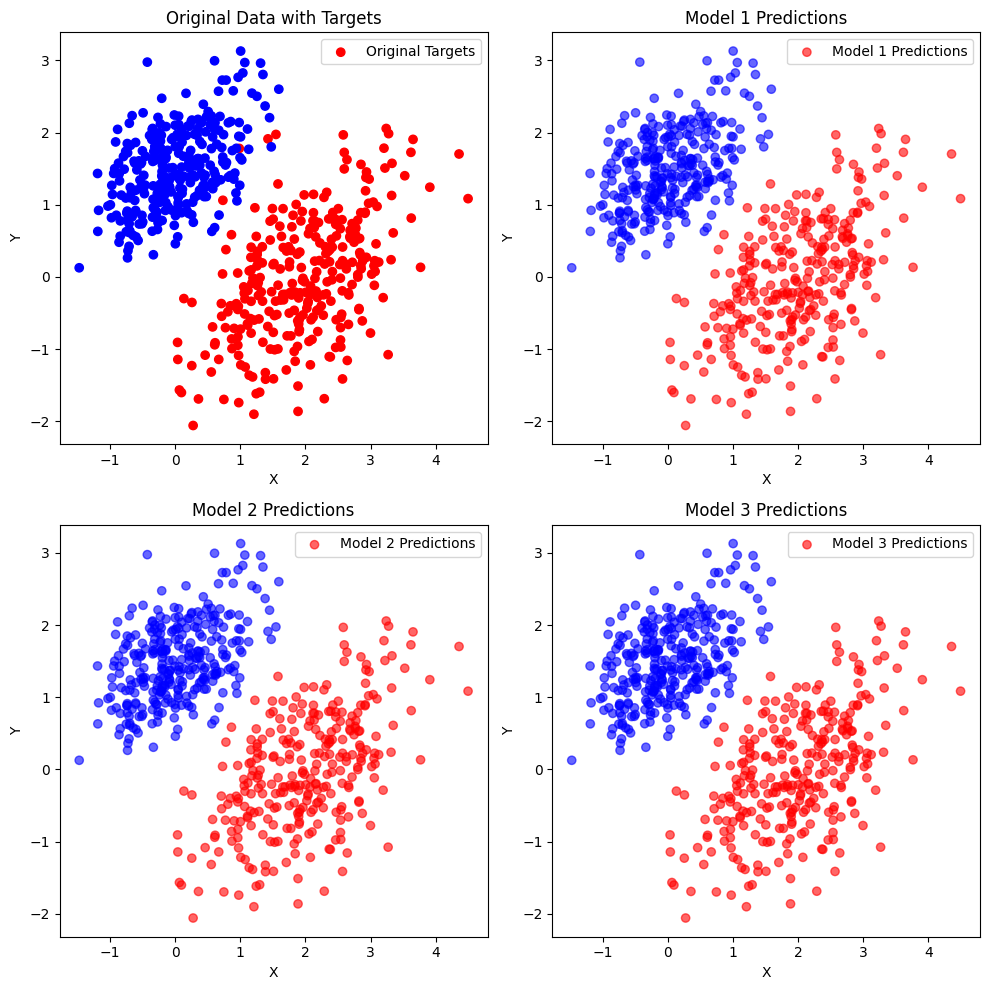

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split


mean1 = [0, 1.5]
cov1 = [[1/3, 1/6], [1/6, 1/3]]
class1 = np.random.multivariate_normal(mean1, cov1, 1000)

mean2 = [2, 0]
cov2 = [[2/3, 1/3], [1/3, 2/3]]
class2 = np.random.multivariate_normal(mean2, cov2, 1000)

inputs = np.vstack((class1, class2))
targets = np.hstack((np.zeros(1000), np.ones(1000)))

inputs_train, inputs_val, targets_train, targets_val = train_test_split(inputs, targets, test_size=0.3, random_state=42)


# Model 1:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid')
])

# Model 2:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Model 3:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model1.fit(inputs_train, targets_train, epochs=50, batch_size=16, validation_data=(inputs_val, targets_val))
model2.fit(inputs_train, targets_train, epochs=50, batch_size=16, validation_data=(inputs_val, targets_val))
model3.fit(inputs_train, targets_train, epochs=50, batch_size=16, validation_data=(inputs_val, targets_val))

preds1 = model1.predict(inputs_val)
preds2 = model2.predict(inputs_val)
preds3 = model3.predict(inputs_val)

preds1_class = (preds1.flatten() > 0.5).astype(int)
preds2_class = (preds2.flatten() > 0.5).astype(int)
preds3_class = (preds3.flatten() > 0.5).astype(int)

# 2x2 plot
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].scatter(inputs_val[:, 0], inputs_val[:, 1], c=targets_val, cmap='bwr', marker='o', label="Original Targets")
axes[0, 0].set_title("Original Data with Targets")
axes[0, 0].set_xlabel("X")
axes[0, 0].set_ylabel("Y")
axes[0, 0].legend()

axes[0, 1].scatter(inputs_val[:, 0], inputs_val[:, 1], c=preds1_class, cmap='bwr', marker='o', label="Model 1 Predictions", alpha=0.6)
axes[0, 1].set_title("Model 1 Predictions")
axes[0, 1].set_xlabel("X")
axes[0, 1].set_ylabel("Y")
axes[0, 1].legend()

axes[1, 0].scatter(inputs_val[:, 0], inputs_val[:, 1], c=preds2_class, cmap='bwr', marker='o', label="Model 2 Predictions", alpha=0.6)
axes[1, 0].set_title("Model 2 Predictions")
axes[1, 0].set_xlabel("X")
axes[1, 0].set_ylabel("Y")
axes[1, 0].legend()

axes[1, 1].scatter(inputs_val[:, 0], inputs_val[:, 1], c=preds3_class, cmap='bwr', marker='o', label="Model 3 Predictions", alpha=0.6)
axes[1, 1].set_title("Model 3 Predictions")
axes[1, 1].set_xlabel("X")
axes[1, 1].set_ylabel("Y")
axes[1, 1].legend()

plt.tight_layout()
plt.show()